In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

ds = pd.read_csv('Assignment 4v2.csv', sep=',')
ds = ds.dropna()
ds.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
stroke_train, stroke_test = train_test_split(ds, test_size=0.3, random_state=42, stratify=ds['stroke'])
print(stroke_train.shape, stroke_test.shape)

(3435, 12) (1473, 12)


In [4]:
features= ['avg_glucose_level', 'bmi', 'heart_disease']
dt_classification = DecisionTreeClassifier(max_depth = 4) 
dt_classification.fit(stroke_train[features], stroke_train['stroke'])

DecisionTreeClassifier(max_depth=4)

In [5]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

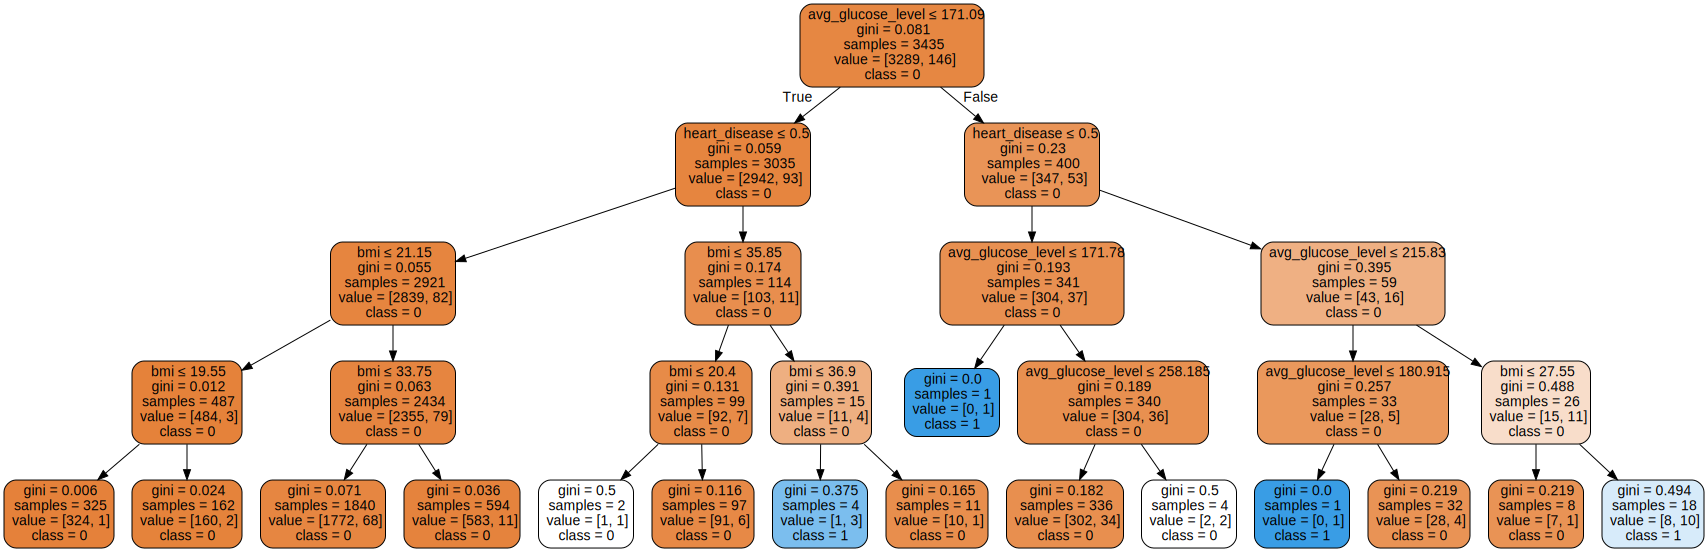

In [6]:
plot_tree_classification(dt_classification, features, np.sort(ds.stroke.unique().astype(str)))

Zoals in de Decision tree te zien is, is er niet echt duidelijk te zien wanneer iemand een stroke kan krijgen (heel veel vakken geven een 0 terug wat dus aangeeft dat iemand geen stroke krijgt) Persoonlijk denk ik dat dit komt omdat er geen goede verhouding is tussen het aantal mensen dat een stroke heeft gekregen en het aantal mensen dat geen stroke heeft gekregen. Om te kijken of deze verhouding invloed heeft op de decision tree, zal er hieronder een dataframe gemaakt worden waarin de verhouding van mensen die wel en geen stroke hebben gekregen, gelijk zal zijn.

In [7]:
stroke = ds[ds['stroke'] == 1]
noStroke = ds[ds['stroke'] == 0]
display(stroke)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
243,40460,Female,68.0,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1


Zoals hierboven te zien zijn er in totaal 209 mensen die een stroke hebben gehad. Dus de verhouding tussen een stroke en geen stroke zal dus 209 om 209 zijn om zo een (hopelijk) beter beeld te krijgen van de decision tree

In [8]:
noStroke = noStroke.sample(n=209, random_state=1)
frames = [stroke, noStroke]
result = pd.concat(frames)
display(result)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4927,65469,Male,11.0,0,0,No,children,Rural,121.71,23.4,never smoked,0
352,40670,Female,20.0,0,0,No,Private,Rural,96.57,34.1,never smoked,0
1590,1625,Female,13.0,0,0,No,children,Urban,99.13,22.8,Unknown,0
2659,70886,Female,7.0,0,0,No,children,Rural,114.82,33.3,Unknown,0


In [9]:
stroke_train, stroke_test = train_test_split(result, test_size=0.3, random_state=42, stratify=result['stroke'])
print(stroke_train.shape, stroke_test.shape)

(292, 12) (126, 12)


In [10]:
features= ['avg_glucose_level', 'bmi', 'heart_disease']
dt_classification = DecisionTreeClassifier(max_depth = 4) 
dt_classification.fit(stroke_train[features], stroke_train['stroke'])

DecisionTreeClassifier(max_depth=4)

In [11]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

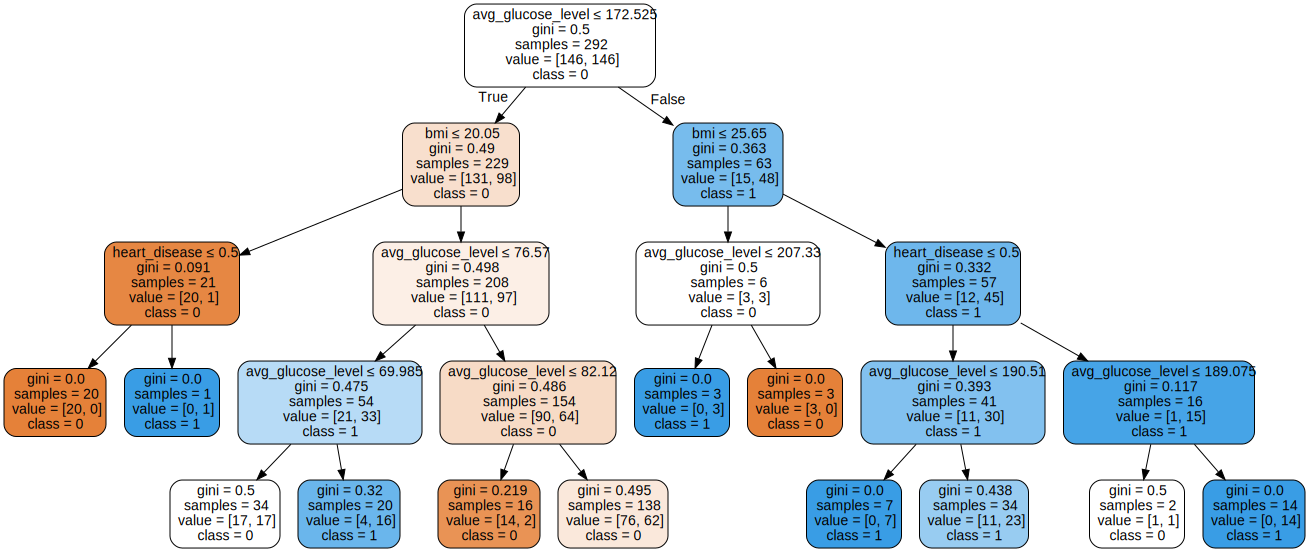

In [12]:
plot_tree_classification(dt_classification, features, np.sort(result.stroke.unique().astype(str)))

Zoals verwacht zijn de twee decision trees nu zeer verschillend. Alhoewel het soms nog wat onduidelijkheid geeft, is het nu beter te bepalen welke factoren er nu verantwoordelijk zijn voor het veroorzaken van een stroke. Persoonlijk had ik dit wel verwacht omdat de verhouding nu klopt waardoor er in mijn ogen beter bepaald kan worden welke factoren en waardes verantwoordelijk kunnen zijn voor het veroorzaken van een stroke

In [14]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [16]:
predictionsOnTrainset = dt_classification.predict(stroke_train[features])
predictionsOnTestset = dt_classification.predict(stroke_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, stroke_train.stroke)
accuracyTest = calculate_accuracy(predictionsOnTestset, stroke_test.stroke)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.6678082191780822
Accuracy on test set 0.6428571428571429


Er zit nu een zeer klein verschil tussen de nauwkerigheid tussen de training en de test set. Dit verschil komt waarschijnlijk doordat er nu een dataframe gebruikt wordt waarin de verhouding evenredig is aan elkaar. Hierdoor zal het verschil kleiner zijn maar zal de trainingset toch iets nauwkeuriger zijn omdat deze aanzienlijk meer data bevat waardoor deze beter een voorspelling kan doen dan de test set.